In [14]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [15]:
aml1 = pd.read_csv("aml1.disruption_scores.csv",index_col='gene').sort_values(by='combined',ascending=False)
aml2 = pd.read_csv("aml2.disruption_scores.csv",index_col='gene').sort_values(by='combined',ascending=False)
aml3 = pd.read_csv("aml3.disruption_scores.csv",index_col='gene').sort_values(by='combined',ascending=False)

In [16]:
p07 = pd.read_csv("dnm_12H007.disruption_scores.csv",index_col='gene').sort_values(by='combined',ascending=False)
p10 = pd.read_csv("dnm_12H010.disruption_scores.csv",index_col='gene').sort_values(by='combined',ascending=False)

In [17]:
aml1 = aml1[np.log(aml1["gene_std"])>0]
aml2 = aml2[np.log(aml2["gene_std"])>0]
aml3 = aml3[np.log(aml3["gene_std"])>0]
p07 = p07[np.log(p07["gene_std"])>0]
p10 = p10[np.log(p10["gene_std"])>0]

In [18]:
np.intersect1d(p07.index[0:20],p10.index[0:20])

array(['C1QTNF4', 'CLDN10'], dtype=object)

In [19]:
dnm_indices = np.intersect1d(p10.index,p07.index)
tet2 = np.intersect1d(aml1.index,np.intersect1d(aml2.index,aml3.index))

In [20]:
all_inds = np.intersect1d(dnm_indices,tet2)

In [21]:
#read in TFs list
tfs=pd.read_csv("Human_TF_MotifList_v_1.01.txt",sep='\t')

tfs_in=[]
for i in tfs["HGNC symbol"]:
    if i in all_inds:
        tfs_in.append(i)

all_inds=np.unique(tfs_in)

In [30]:
aml1 = aml1.loc[all_inds]
aml2 = aml2.loc[all_inds]
aml3 = aml3.loc[all_inds]
p07= p07.loc[all_inds]
p10 = p10.loc[all_inds]

In [31]:
cat1 = np.mean(np.concatenate(([list(p07['combined'])],[list(p10["combined"])]),axis=0),axis=0)
cat2 = np.mean(np.concatenate(([list(aml1['combined'])],[list(aml2['combined'])],
                               [list(aml3["combined"])]),axis=0),axis=0)

In [85]:
cat1 = np.mean(np.concatenate(([list(p07['shape'])],[list(p10["shape"])]),axis=0),axis=0)
cat2 = np.mean(np.concatenate(([list(aml1['shape'])],[list(aml2['shape'])],
                               [list(aml3["shape"])]),axis=0),axis=0)

In [32]:
cat1_percent = np.percentile(cat1,80)
cat2_percent = np.percentile(cat2, 80)
colors = []
for i in range(len(cat1)):
    if cat1[i]>cat1_percent or cat2[i]>cat2_percent:
        colors.append("red")
    else:
        colors.append("blue")

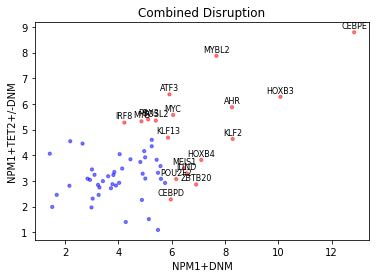

In [33]:
plt.scatter(np.asarray(cat1),
            np.asarray(cat2),color=colors,s=10,alpha=.5)
plt.title("Combined Disruption")
plt.xlabel("NPM1+DNM")
plt.ylabel("NPM1+TET2+/-DNM")
for i in range(len(all_inds)):
    if cat1[i]>cat1_percent or cat2[i]>cat2_percent:
            #print(all_inds[i])
        plt.annotate(all_inds[i],
                         [cat1[i],cat2[i]], # these are the coordinates to position the label
                         textcoords="offset points", color='black',fontsize=8,
                         xytext=(0,4), 
                         ha='center')

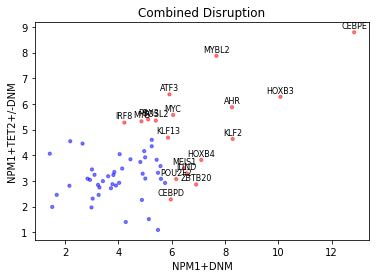

In [84]:
plt.scatter(np.asarray(cat1),
            np.asarray(cat2),color=colors,s=10,alpha=.5)
plt.title("Combined Disruption")
plt.xlabel("NPM1+DNM")
plt.ylabel("NPM1+TET2+/-DNM")
for i in range(len(all_inds)):
    if cat1[i]>cat1_percent or cat2[i]>cat2_percent:
            #print(all_inds[i])
        plt.annotate(all_inds[i],
                         [cat1[i],cat2[i]], # these are the coordinates to position the label
                         textcoords="offset points", color='black',fontsize=8,
                         xytext=(0,4), 
                         ha='center')
plt.savefig("combined_patient_comparison.pdf")

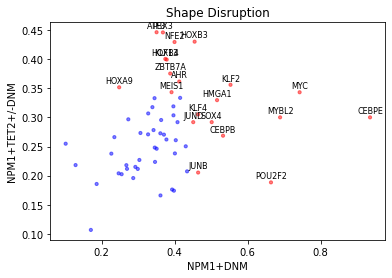

In [88]:
plt.scatter(np.asarray(cat1),
            np.asarray(cat2),color=colors,s=10,alpha=.5)
plt.title("Shape Disruption")
plt.xlabel("NPM1+DNM")
plt.ylabel("NPM1+TET2+/-DNM")

#plt.scatter(cat1[p],cat2[p],s=10,c='lime')
for i in range(len(all_inds)):
    if cat1[i]>cat1_percent or cat2[i]>cat2_percent:
            #print(all_inds[i])
        plt.annotate(all_inds[i],
                         [cat1[i],cat2[i]], # these are the coordinates to position the label
                         textcoords="offset points", color='black',fontsize=8,
                         xytext=(0,4), 
                         ha='center')
plt.savefig("shape_patient_comparison.pdf")

In [78]:
cat1 = np.unique(list(p07.loc[all_inds].sort_values(by='combined',ascending=False)[0:50].index)
                 +list(p10.loc[all_inds].sort_values(by='combined',ascending=False)[0:50].index))
cat2 = np.unique(list(aml1.loc[all_inds].sort_values(by='combined',ascending=False)[0:50].index)
                +list(aml3.loc[all_inds].sort_values(by='combined',ascending=False)[0:50].index)
    +list(aml2.loc[all_inds].sort_values(by='combined',ascending=False)[0:50].index))

In [79]:
len(cat2)

59

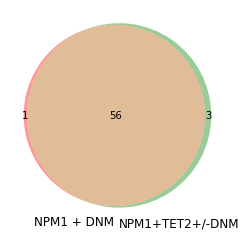

In [80]:
# Create a Venn diagram with two sets
from matplotlib_venn import venn2
set1 = set(cat1)
set2 = set(cat2)

# Create a Venn diagram with three sets
venn_diagram = venn2([set1, set2], set_labels=('NPM1 + DNM', 'NPM1+TET2+/-DNM'))
plt.savefig("VENN_DIAGRAM.pdf")

In [113]:
np.intersect1d(cat1,cat2)

array(['APOC1', 'APP', 'ASF1B', 'C1QTNF4', 'CCNA2', 'CD48', 'CDC20',
       'CDCA5', 'CEBPE', 'CPA3', 'CRIP1', 'CSF2RA', 'CST7', 'CXCL8',
       'FCN1', 'GINS2', 'GNG11', 'GPR183', 'HBB', 'HOXB3', 'IGFBP2',
       'IGLL1', 'JCHAIN', 'KCNE5', 'MATK', 'MPO', 'MS4A3', 'NCF1', 'NPW',
       'PRTN3', 'RRM2', 'S100A12', 'SERPINA1', 'SMIM24', 'STMN1',
       'TNFAIP2', 'TNFRSF1B', 'TPX2', 'TYMS', 'UHRF1', 'VCAN'],
      dtype='<U10')

In [84]:
len(np.unique(list(p07.sort_values(by='combined',ascending=False)[0:50].index)+list(p10.sort_values(by='combined',ascending=False)[0:50].index)))


92

# 3D scatter for tet2

In [4]:
tfs=pd.read_csv("Human_TF_MotifList_v_1.01.txt",sep='\t')["HGNC symbol"]

In [5]:
aml1 = pd.read_csv("aml1.disruption_scores.csv",index_col='gene').sort_values(by='combined',ascending=False)
aml2 = pd.read_csv("aml2.disruption_scores.csv",index_col='gene').sort_values(by='combined',ascending=False)
aml3 = pd.read_csv("aml3.disruption_scores.csv",index_col='gene').sort_values(by='combined',ascending=False)

In [7]:
tet2 = np.intersect1d(aml1.index,np.intersect1d(aml2.index,aml3.index))

In [8]:
tf_list = np.intersect1d(tet2,tfs)

In [9]:
disrupted_3 = np.unique(list(aml1.loc[tf_list].sort_values(by='combined',ascending=False)[0:20].index)
                        +list(aml1.loc[tf_list].sort_values(by='combined',ascending=False)[0:20].index)
                        +list(aml1.loc[tf_list].sort_values(by='combined',ascending=False)[0:20].index))

In [10]:
np.intersect1d(disrupted_3,tf_list)

array(['AHR', 'BCL6', 'BHLHE40', 'CEBPA', 'CEBPE', 'CREB5', 'FOSL2',
       'GATA1', 'HIC1', 'HLX', 'HOXA3', 'HOXB3', 'IRF4', 'KLF1', 'MAFB',
       'MYBL2', 'NFIL3', 'PBX3', 'SPIB', 'ZNF331'], dtype=object)

In [11]:
colors = []
for i in tf_list:
    if i in disrupted_3:
        colors.append('red')
    else:
        colors.append('grey')

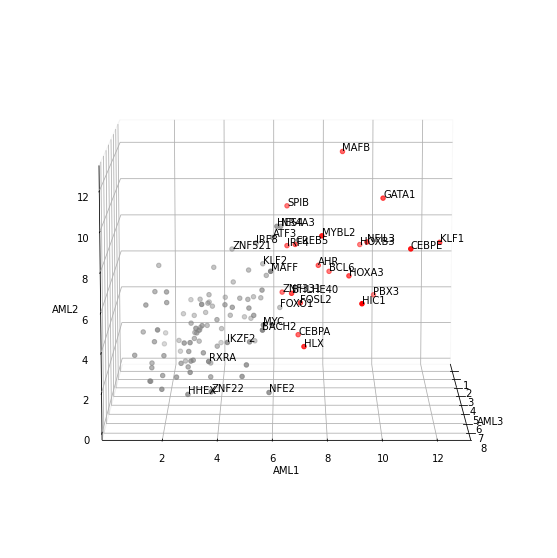

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

#ax.scatter(istg_tfs['p1'],istg_tfs['p3'],istg_tfs['p89'],c=np.mean(istg_tfs,axis=1),s=20,cmap='rainbow')
ax.scatter(aml3.loc[tf_list]['combined'],aml1.loc[tf_list]['combined'],aml2.loc[tf_list]['combined'],c=colors ,s=20)
ax.set_xlabel("AML3")
ax.set_ylabel("AML1")
ax.set_zlabel("AML2")

for i in tf_list:
    if aml1.loc[i]['combined']>6 or aml2.loc[i]['combined']>6 or aml3.loc[i]['combined']>6:
        ax.text(aml3.loc[i]['combined'],aml1.loc[i]['combined'],aml2.loc[i]['combined'],i)
    
ax.view_init(elev=10, azim=0)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.savefig("AML1_2_3_combined_score_comparison.pdf")

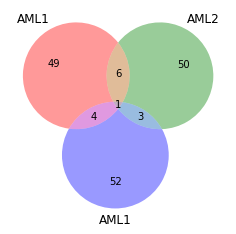

In [56]:
# Create a Venn diagram with two sets
from matplotlib_venn import venn3
set1 = set(aml1.index[0:60])
set2 = set(aml2.index[0:60])
set3 = set(aml3.index[0:60])

# Create a Venn diagram with three sets
venn_diagram = venn3([set1, set2, set3], set_labels=('AML1',"AML2",'AML1'))
#plt.savefig("VENN_DIAGRAM.pdf")